# Assignment 5: Estimating Optical Flow with FlowNet 

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [12]:
import torch
import matplotlib.pyplot as plt

from eval import AEPE
from color import flow_visualize
from inout import readTensor, imwrite, read

## Part 1 Q1: Evaluation of Optical Flow

(436, 1024, 3)
aepe=0.002


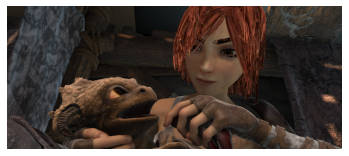

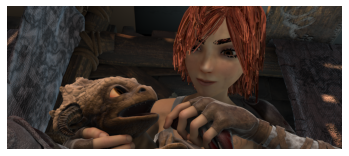

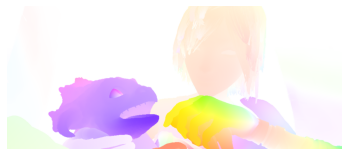

In [14]:
# 
# Please edit the file eval.py to solve the question and use this code for testing
#

image1 = read('data/Sintel1.png')
image2 = read('data/Sintel2.png')
gt_flow = readTensor('data/Sintel.flo')

# We add noise to the GT flow to simulate an error
noise = torch.randn_like(gt_flow)
print(image1.shape)
# Compute and print the error: 
aepe = AEPE(gt_flow, gt_flow + noise)
print(f"{aepe=:.3f}")

# Visualize the gt flow 
coloured_flow = flow_visualize(gt_flow, 7)

# Write to file and plot
imwrite('out/sintel_flow_coded_gt.png', coloured_flow)
plt.imshow(image1)
plt.axis('off')
plt.show()
plt.imshow(image2)
plt.axis('off')
plt.show()
plt.imshow(coloured_flow)
plt.axis('off')
plt.show()

# Part 2: Variational Optical Flow

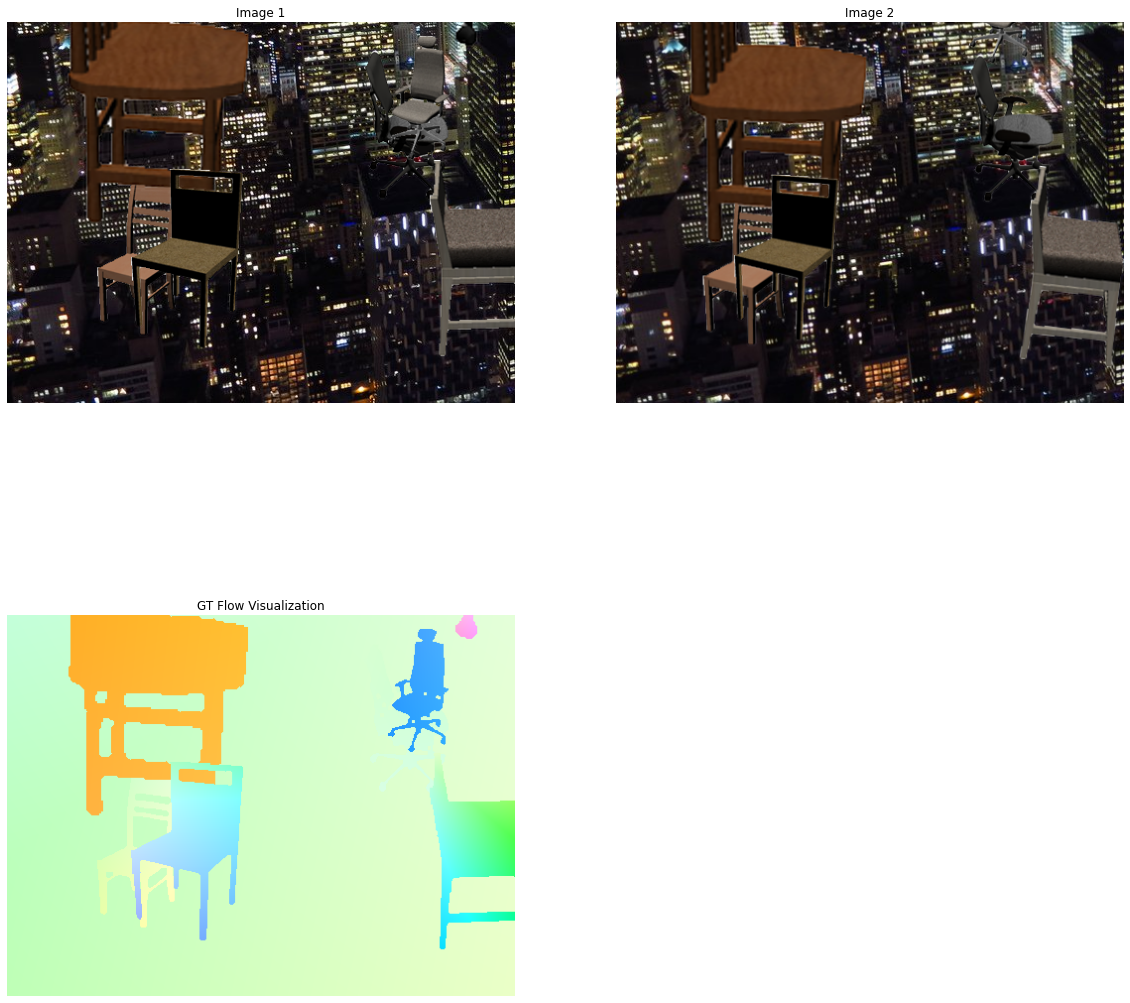

In [15]:
import subprocess

# Read images and gt flow
image1 = read('data/image1.png')
image2 = read('data/image2.png')
gt_flow = readTensor('data/flow.flo')

# Visualize flow
colored_flow = flow_visualize(gt_flow, 30)
imwrite('out/chair_flow_coded_gt.png', colored_flow)

# Plot everything
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0,0].set_title("Image 1")
ax[0,0].imshow(image1)
ax[0,0].axis('off')

ax[0,1].set_title("Image 2")
ax[0,1].imshow(image2)
ax[0,1].axis('off')

ax[1,0].set_title("GT Flow Visualization")
ax[1,0].imshow(colored_flow)
ax[1,0].axis('off')

ax[1,1].remove() 

plt.show()

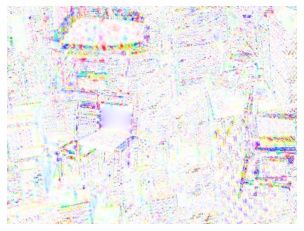

Horn an Schunck AEPE: 0.041


In [16]:
# Run Horn and Schunck

#subprocess.call(['./variational/hornschunck', './data/image1.ppm', './data/image2.ppm', './out/hornschunck.flo', '1000', '1'])
hs = readTensor('out/hornschunck.flo')

hornschunck_flow = flow_visualize(hs, 30)
imwrite('out/hornschunck.png', hornschunck_flow)
plt.imshow(hornschunck_flow)
plt.axis('off')
plt.show()

HornSchunck_AEPE = AEPE(hs, gt_flow)
print(f"Horn an Schunck AEPE: {HornSchunck_AEPE:.3f}")


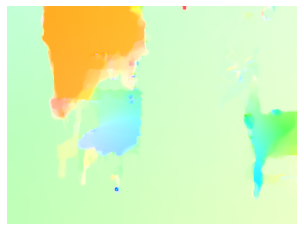

LODF AEPE: 0.033


In [17]:
# Run LDOF

#subprocess.call(['variational/ldof', 'data/image1.ppm', 'data/image2.ppm', 'out/ldof.flo'])
ldof = readTensor('out/ldof.flo')
ldof_flow = flow_visualize(ldof, 30)
imwrite('out/ldof.png', ldof_flow)
plt.imshow(ldof_flow)
plt.axis('off')
plt.show()

LDOF_AEPE = AEPE(ldof, gt_flow)
print(f"LODF AEPE: {LDOF_AEPE:.3f}")


    ######################################################################################################
    # Part2 Q1) Inspect the flow fields and reason about their qualities 
    ######################################################################################################

    # ***** START OF YOUR ANSWER (DO NOT DELETE/MODIFY THIS LINE)*****
    From the images it is evident that there are large displacments spnanning over multitude of pixels. Due to this reason the continuity assumption of the HandS method id vioated and we get a non smooth flow fiels , characterized by blots of white space and other colours, but still we see the skeleton shale pf the objects can be discernible like that of the chair in the centre and to the right, but the LDOF is invariant to large displacements and we see a much smooth and continous flow fields

# Part 3: Optical Flow with Deep Learning

In [18]:
from wrapper import ModelWrapper
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

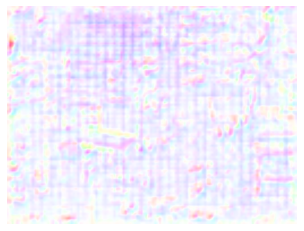

FlowNetS AEPE: 0.040


In [19]:
# Initialize the model wrapper
model = ModelWrapper(device=device)

# Load FlowNetS and evaluate
model.load_net('checkpoints/FlowNetS.pth')
flow = model.eval(image1, image2)

# Visualized colored flow 
colored_flow = flow_visualize(flow.detach(), 30)
imwrite('out/flownets.png', colored_flow)
plt.imshow(colored_flow)
plt.axis('off')
plt.show()

# Compute APEE 
flownets_AEPE = AEPE(flow, gt_flow)
print(f"FlowNetS AEPE: {flownets_AEPE:.3f}")

# Task 4: Optical Flow with FlowNetC

False
7.655990123748779


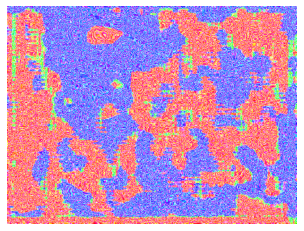

FlowNetS AEPE: 0.475


In [20]:
# Initialize the model wrapper
from wrapper import ModelWrapper

model = ModelWrapper(device=device)

# Load FlowNetC
model.load_net('checkpoints/FlowNetC.pth')

# Test if your implementation of the correlation layer is correct
model.test_correlation(image1, image2, 'data/correlation_layer_output.pth')

# Evaluate
flow = model.eval(image1, image2)

# Visualized colored flow 
colored_flow = flow_visualize(flow.detach(), 30)
imwrite('out/flownetc.png', colored_flow)
plt.imshow(colored_flow)
plt.axis('off')
plt.show()

# Compute APEE 
flownetc_AEPE = AEPE(flow, gt_flow)
print(f"FlowNetS AEPE: {flownetc_AEPE:.3f}")

# Load FlowNetC
model.load_net('checkpoints/FlowNetC.pth')